<a href="https://colab.research.google.com/github/wisrovi/SAM/blob/master/Ejercicio_PID_temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Invernadero

<img src="https://hydroenv.com.mx/catalogo/images/00_Diana/tipos_invernaderos/ventilacion_en_invernaderos.jpg">

In [1]:
setPoint = 20

actuador = {
    1 : "Ventilador",
    2 : "Lampara calor"
}

estadosActuadores = {
    1 : "ON",
    0 : "OFF"
}

sensores = {
    1 : "Temperatura"
}

### Vamos a crear el dataseet

In [2]:
import random

def FuncionRespuesta(entrada):
  salida1 = 0    #Ventilador
  salida2 = 0    #calentador
  if entrada > setPoint:
    salida1 = 1
    salida2 = 0
  elif entrada < setPoint:
    salida1 = 0
    salida2 = 1
  else:
    salida1 = 0
    salida2 = 0
  return salida1, salida2

In [3]:
def temperaturaAleatoria():
  return random.randint(10,45)

In [4]:
temperatura = temperaturaAleatoria()
salida1, salida2 = FuncionRespuesta(temperatura)  
print(sensores[1] +": ", temperatura)
print(actuador[1] + ": " + estadosActuadores[salida1])
print(actuador[2] + ": " + estadosActuadores[salida2])

Temperatura:  16
Ventilador: OFF
Lampara calor: ON


In [5]:
def GenerarDatos(cantidad):
  training_data = []
  target_data = []
  valorPasado = 0
  for i in range(cantidad):
    temperatura = temperaturaAleatoria()
    if valorPasado != temperatura:
      valorPasado = temperatura
      training_data.append([temperatura])
      salida1, salida2 = FuncionRespuesta(temperatura) 
      target_data.append([salida1, salida2])
    else:
      i -= 1
  return training_data, target_data


In [6]:
training, target = GenerarDatos(5000)
for i in range(len(training)):
  #print(training[i], target[i])
  pass

# Convertimos los datos a arrays de numpy

In [7]:
import numpy as np #Utilizaremos numpy para el manejo de arrays.

#Creamos los arrays de entrada y salida.
training_data = np.array(training, "float32")
target_data = np.array(target, "float32")

In [8]:
training_data

array([[25.],
       [38.],
       [28.],
       ...,
       [25.],
       [15.],
       [44.]], dtype=float32)

In [9]:
target_data

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Importamos las clases que utilizaremos:

In [94]:
from keras.models import Sequential #De Keras importamos el tipo de modelo Sequential
from keras.layers.core import Input, Dense # y el tipo de capa Dense que es la «normal».
from keras.layers import Conv2D, MaxPooling2D, Flatten

ImportError: ignored

# Ahora crearemos la arquitectura de nuestra red neuronal:

In [11]:
funcionesActivacion = {
    "relu" : "relu",
    "simoide" : 'sigmoid', 
    "tangente" : "tanh",
    "softmax" : "softmax"
}

Piense en un modelo secuencial como una tubería con sus datos brutos introducidos en la parte inferior y las predicciones que salen en la parte superior. Esta es una concepción útil en Keras, ya que las preocupaciones que tradicionalmente se asociaban con una capa también pueden dividirse y añadirse como capas separadas, mostrando claramente su papel en la transformación de los datos de entrada a predicción. Por ejemplo, las funciones de activación que transforman una señal sumada de cada neurona en una capa, pueden ser extraídas y añadidas a la Sequencial como un objeto similar a una capa llamado la clase Activation.

In [93]:
numeroEntradas = 1
NumeroNeuronasEntrada = numeroEntradas
NumeroNeuronasPrimeraCapaOculta = 2

numeroSalidas = 2
NumeroNeuronasSalida = numeroSalidas

model = Sequential()
model.add(Input(NumeroNeuronasEntrada))
model.add(Dense(NumeroNeuronasPrimeraCapaOculta, activation=funcionesActivacion['relu']), name="Capa 1") #La mas probada por dar buenos resultados es la relu
model.add(Dense(NumeroNeuronasSalida, activation=funcionesActivacion['simoide']), name="Capa 2") #Añadimos dos capas tipo dense, una para cada salida

model.summary()

NameError: ignored

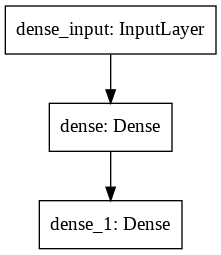

In [13]:
from keras.utils import plot_model
# gráfico de trazado
plot_model(model, to_file='Red_Neuronall.png')

Primero creamos un modelo vació de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, «una delante de otra».

# A Entrenar la red!

Antes de de entrenar la red haremos unos ajustes de nuestro modelo:

In [14]:
model.compile(loss='mean_squared_error',  #Usamos el error cuadratico para tener valores absolutos y facil de medir
              optimizer='adam',  #Adam es un tipo de optimizador que no requiere parámetros de learning rate explícitos sino que los estima
              metrics=['binary_accuracy'])  #Finalmente algo que no hemos visto son las métricas. Son funciones útiles que ayudan a monitorizar el proceso pero que no participan activamente en el entrenamiento.

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el «optimizador» de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

### Ahora sí que entrenaremos la red:

Indicamos con model.fit() las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (epochs) de entrenamiento.

In [88]:
history = model.fit(training_data, target_data, epochs=250)

Epoch 1/250
152/152 [==============================] - 0s 938us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 2/250
152/152 [==============================] - 0s 818us/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 3/250
152/152 [==============================] - 0s 880us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 4/250
152/152 [==============================] - 0s 943us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 5/250
152/152 [==============================] - 0s 980us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 6/250
152/152 [==============================] - 0s 902us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 7/250
152/152 [==============================] - 0s 936us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 8/250
152/152 [==============================] - 0s 938us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 9/250
152/152 [==============================] - 0s 826us/step - loss: 0.0013 - binary_accuracy: 1.0000
Epoch 10/2

dict_keys(['loss', 'binary_accuracy'])


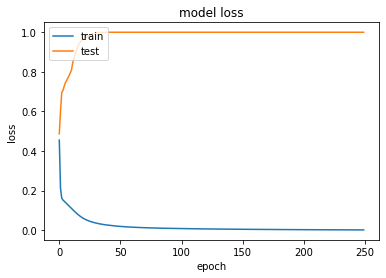

In [16]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Este es un ejemplo sencillo, pero recuerda que en modelos más grandes y complejos, necesitarán más iteraciones y a la vez será más lento el entrenamiento.

Como los pesos iniciales de la red son aleatorios, puede que las salidas que tengas en tu ordenador sean levemente distintas en cuanto a las iteraciones, pero llegarás a la «precisión binaria» (binara_accuracy) de 1.0.

### Evaluamos y Predecimos

Primero evaluamos el modelo

In [17]:
scores = model.evaluate(training_data, target_data)

152/152 [==============================] - 0s 722us/step - loss: 0.0014 - binary_accuracy: 1.0000


In [18]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


binary_accuracy: 100.00%


In [19]:
def usarRedNeuronalPredecirSalidas(entrada):
  training_data = np.array([entrada], "float32")
  prediccion = model.predict(training_data).round()[0]

  salida1 = int(prediccion[0])
  salida2 = int(prediccion[1])
  return salida1, salida2


entrada = temperaturaAleatoria()
salida1, salida2 = usarRedNeuronalPredecirSalidas(entrada)
print("Temperatura: ", entrada)
print(actuador[1] + ": " + estadosActuadores[salida1])
print(actuador[2] + ": " + estadosActuadores[salida2])

Temperatura:  37
Ventilador: ON
Lampara calor: OFF


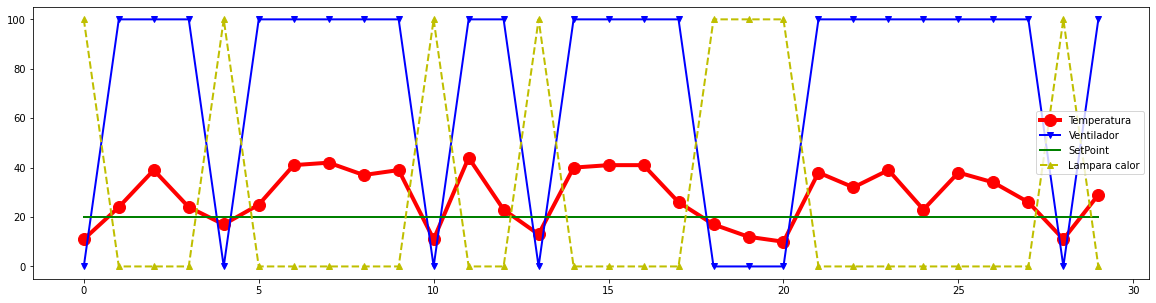

In [20]:
cantidadDatosEvaludar = 30

historialTemperatura = []
historialVentilador = []
historialCalefactor = []
puntoEquilibrio = []
for i in range(cantidadDatosEvaludar):
  entrada = temperaturaAleatoria()
  salida1, salida2 = usarRedNeuronalPredecirSalidas(entrada)
  historialTemperatura.append(entrada)
  historialVentilador.append(salida1*100)
  historialCalefactor.append(salida2*100)  
  puntoEquilibrio.append(setPoint)
    
    
    
    
    
    
    
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({
    't': range(0,len(historialTemperatura)), 
    sensores[1]: historialTemperatura, 
    actuador[1]: historialVentilador, 
    actuador[2]: historialCalefactor , 
    "SetPoint": puntoEquilibrio 
})
 
# multiple line plot
plt.rcParams["figure.figsize"] = (20,5)
plt.plot( 't', sensores[1], data=df, marker='o', markerfacecolor='r', markersize=12, color='r', linewidth=4)
plt.plot( 't', actuador[1], data=df, marker='v', color='b', linewidth=2)
plt.plot( 't', "SetPoint", data=df, marker='', color='g', linewidth=2)
plt.plot( 't', actuador[2], data=df, marker='^', color='y', linewidth=2, linestyle='dashed')
plt.legend()


# Afinando parámetros de la red neuronal

Cantidad de capas de la red (en nuestro caso son 3)

Cantidad de neuronas en cada red (nosotros tenemos 1 de entrada, 2 en capa oculta y 2 de salida)

Funciones de activación de cada capa. Nosotros utilizamos relu y sigmoid

Al compilar el modelo definir las funciones de pérdida, optimizer y métricas.

Cantidad de iteraciones de entrenamiento.

In [ ]:
#model = Sequential()
#model.add(Conv2D(2, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())

En este ejemplo que es muy sencillo, puedes intentar variar por ejemplo la cantidad de neuronas de entrada, probar con 8 o con 32 y ver qué resultados obtienes. Por ejemplo, si necesita más o menos iteraciones para alcanzar el 100% de aciertos. 

# Guardar la red y usarla -de verdad-

Si esto fuera un caso real, en el cual entrenamos una red, la ajustamos y obtenemos buenos resultados, ahora deberíamos Guardar esa red ya que esa red óptima, tiene los pesos que estábamos buscando. Sería tonto y lento entrenar cada vez la red antes de «publicar en producción».

Lo que hacemos es guardar esa red y en OTRO código cargaríamos la red y la utilizamos como si fuera una librería o una funcion que creamos. Pasándole entradas y obteniendo las predicciones.

Para guardar y cargar nuestra red, utilizaremos el siguiente código de ejemplo:

In [21]:
nombreModeloGuardado = "model.json"
nombrePesosGuardados = "model.h5"

In [22]:
# serializar el modelo a JSON
model_json = model.to_json()
with open(nombreModeloGuardado, "w") as json_file:
    json_file.write(model_json)
    print("Modelo guardado!")


Modelo guardado!


In [23]:
# serializar los pesos a HDF5
model.save_weights(nombrePesosGuardados)
print("Pesos Guardados!")

Pesos Guardados!


Guardando el modelo como TensorFlow Lite, util para correr la red neuronal en algunos microcontroladores

In [27]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmphepcp5gb/assets
Model is 1332 bytes


In [31]:
print(model.get_weights)


print(model.get_output_shape_at)

<bound method Model.get_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f219b5df828>>
<bound method Layer.get_output_shape_at of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f219b5df828>>


In [92]:
def get_pesos_model(modelo, redondeo_pesos = 4):
  total_neuronas = 0
  matrix_pesos = []

  for m in modelo.layers:  
    weight = m.get_weights()
    print("capa")
    print(matrix_pesos)
    for w in weight:
      weight0 = np.array(w)
      for i in weight0:
        if i.shape != ():
          total_neuronas = total_neuronas + i.shape[0]
          vector = i.tolist()
        else:
          total_neuronas = total_neuronas + 1
          vector = [i.tolist()]

        vector_pesos = list()
        for i in vector:
          vector_pesos.append(round(i, redondeo_pesos))
        matrix_pesos.append(vector_pesos)
  return (total_neuronas, matrix_pesos)

(total_neuronas, matrix_pesos) = get_pesos_model(model)
print("Total neuronas: ", total_neuronas)
print(matrix_pesos)

capa
[]
capa
[[0.3958, -0.7383], [-7.5395], [0.0]]
Total neuronas:  10
[[0.3958, -0.7383], [-7.5395], [0.0], [16.5268, -28.6164], [0.643, -1.1752], [-9.1054], [5.6474]]


In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________



Para cargarla:

In [ ]:
from keras.models import model_from_json

# cargar json y crear el modelo
json_file = open(nombreModeloGuardado, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("Modelo Cargado!")


# cargar pesos al nuevo modelo
loaded_model.load_weights(nombrePesosGuardados)
print("Pesos Cargados!")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])


Modelo Cargado!
Pesos Cargados!


Luego de esto, ya usaríamos normalmente loaded_model.predict() y listo!

In [ ]:
def usarRedaNeuronalCargadParaPredecirSalidas(entrada):
  training_data = np.array([entrada], "float32")
  prediccion = loaded_model.predict(training_data).round()[0]

  salida1 = int(prediccion[0])
  salida2 = int(prediccion[1])
  return salida1, salida2


entrada = temperaturaAleatoria()
salida1, salida2 = usarRedaNeuronalCargadParaPredecirSalidas(entrada)
print("Temperatura: ", entrada)
print(actuador[1] + ": " + estadosActuadores[salida1])
print(actuador[2] + ": " + estadosActuadores[salida2])

Temperatura:  14
Ventilador: OFF
Lampara calor: ON


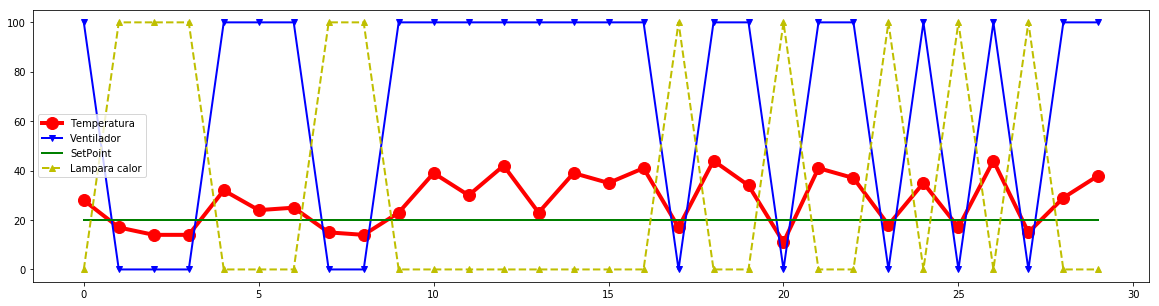

In [ ]:
cantidadDatosEvaludar = 30

historialTemperatura = []
historialVentilador = []
historialCalefactor = []
puntoEquilibrio = []
for i in range(cantidadDatosEvaludar):
  entrada = temperaturaAleatoria()
  salida1, salida2 = usarRedaNeuronalCargadParaPredecirSalidas(entrada)
  historialTemperatura.append(entrada)
  historialVentilador.append(salida1*100)
  historialCalefactor.append(salida2*100)  
  puntoEquilibrio.append(setPoint)
    
    
    
    
    
    
    
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({
    't': range(0,len(historialTemperatura)), 
    sensores[1]: historialTemperatura, 
    actuador[1]: historialVentilador, 
    actuador[2]: historialCalefactor , 
    "SetPoint": puntoEquilibrio 
})
 
# multiple line plot
plt.rcParams["figure.figsize"] = (20,5)
plt.plot( 't', sensores[1], data=df, marker='o', markerfacecolor='r', markersize=12, color='r', linewidth=4)
plt.plot( 't', actuador[1], data=df, marker='v', color='b', linewidth=2)
plt.plot( 't', "SetPoint", data=df, marker='', color='g', linewidth=2)
plt.plot( 't', actuador[2], data=df, marker='^', color='y', linewidth=2, linestyle='dashed')
plt.legend()


# ¿Vale la pena una red neuronal? ¿porqué no programar con if-else?

Luego de visto todo esto, ¿no conviene hacer una programación «tradicional» en vez de entrenar una red neuronal? Pues siempre dependerá del caso.

No quiere decir que haya que reemplazar todo el código del mundo con redes neuronales, pero sí pensar en que casos las redes neuronales nos brindan una flexibilidad y un poder de predicción increíbles -y que se justifican el tiempo de desarrollo-.

Hemos utilizado la librería Keras -y a través de ella, Tensorflow como backend- y creamos el modelo, entrenamos los datos y obtuvimos un buen resultado. Este es el puntapié inicial para seguir viendo diversas arquitecturas de Redes Neuronales e ir aprendiendo poco a poco con Python.